     No.                                 Item_Name Food_Category  \
21    22    #6 Roast Beef & Provolone, White Giant    Sandwiches   
84    85  #6 Roast Beef & Provolone on White Giant    Sandwiches   
79    80          Chicka Phila Roni on White Giant    Sandwiches   
156  157            #9 Club Supreme on Wheat Giant    Sandwiches   
201  202           #17 Jersey Mike's Famous Philly    Sandwiches   

     Serving_Size  Calories  Total_Fat  Saturated_Fat  Trans_Fat  Cholesterol  \
21          772.0      1320       42.0           17.5        0.5          230   
84          765.0      1330       42.5           18.5        0.5          235   
79          739.0      1460       57.0           26.0        1.0          310   
156         831.0      1740       92.5           25.5        0.5          245   
201         779.0      1290       40.0           22.0        1.0          205   

     Sodium  Carbohydrates  Protein  Sugar  Dietary_Fiber  
21     1995            128      107     13  

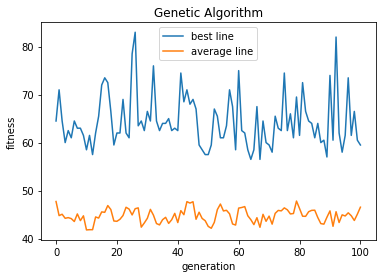

In [144]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(0,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
#     totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
#     return 0.5*totalProtein + 0.5*totalCalories
    return 0.5*totalProtein 
    
def breeding(data, chromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
#         if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
#             if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False
    
    
def findBestAndAve(chromosome):
    for i in chromosome:
        chromosome[i] = fitnessFn(chromosome[i])
    chromosome.sort(reverse = True)
    for j in chromosome:
        crossover(chromosome[j],chromosome[j+1])

# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = 0
    for i in range(0, len(chromosome)):
        temp = int(chromosome[i])*(2**(len(chromosome)-i-1))
        menuNumber += temp
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    return {"sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}

chromosome = []
bestLn = []
avgLn = []
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
print(article_read.head())
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in range(100):
    breeding(article_read, chromosome, bestLn, avgLn)
    gen = gen + 1
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
print(bestLn)
print(avgLn)
print(genLn)
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 






